In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  r2_score , mean_absolute_error , mean_squared_error

In [2]:
Data  = pd.read_csv('D:car data.csv')
Data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
Data.shape

(301, 9)

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
Data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
Data['Current_Year'] = 2024
Data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024


In [7]:
#Calculating Car Age
Data['number of years']=Data['Current_Year']-Data['Year']
Data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,number of years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024,10


### Data preprocessing

#### Cheak if there duplicates Values

In [8]:
Data.duplicated().sum()

2

#### Drop dublicates

In [9]:
Data.drop_duplicates(inplace=True)

#### Cheak if there Missing Values

In [10]:
Data.isnull().sum()

Car_Name           0
Year               0
Selling_Price      0
Present_Price      0
Kms_Driven         0
Fuel_Type          0
Seller_Type        0
Transmission       0
Owner              0
Current_Year       0
number of years    0
dtype: int64

#### Find Outlier

In [11]:
q1 = Data['Kms_Driven'].quantile(0.25)
q3 = Data['Kms_Driven'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + (iqr * 1.5)
lower_bound = q1 - (iqr * 1.5)

Data[(Data['Kms_Driven'] > upper_bound) | (Data['Kms_Driven'] <lower_bound) ]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,number of years
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0,2024,21
50,fortuner,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0,2024,12
53,fortuner,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0,2024,11
77,corolla,2004,1.50,12.35,135154,Petrol,Dealer,Automatic,0,2024,20
84,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0,2024,19
85,camry,2006,2.50,23.73,142000,Petrol,Individual,Automatic,3,2024,18
179,Honda Karizma,2010,0.31,1.05,213000,Petrol,Individual,Manual,0,2024,14
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0,2024,16


 #### Remove Outlier

In [12]:
Data = Data[(Data['Kms_Driven'] < upper_bound) & (Data['Kms_Driven'] > lower_bound) ]

In [13]:
Data.shape

(291, 11)

In [14]:
Data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Current_Year',
       'number of years'],
      dtype='object')

In [15]:
Data.dtypes

Car_Name            object
Year                 int64
Selling_Price      float64
Present_Price      float64
Kms_Driven           int64
Fuel_Type           object
Seller_Type         object
Transmission        object
Owner                int64
Current_Year         int64
number of years      int64
dtype: object

####  Data Exploring

Manual       257
Automatic     34
Name: Transmission, dtype: int64


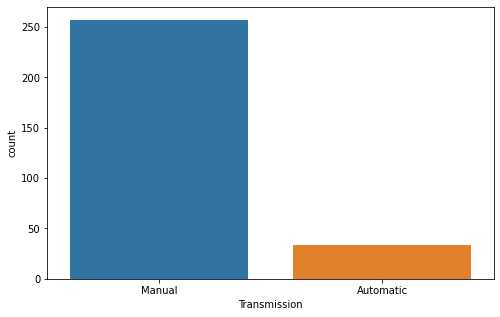

In [16]:
print(Data['Transmission'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(data=Data , x='Transmission')
plt.show()

Petrol    234
Diesel     55
CNG         2
Name: Fuel_Type, dtype: int64


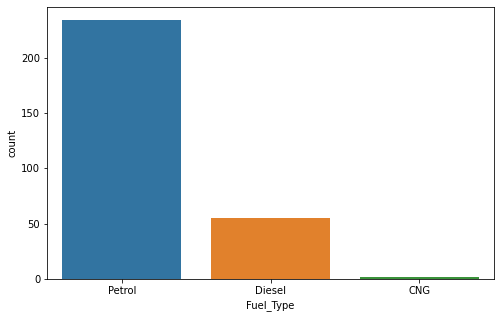

In [17]:
print(Data['Fuel_Type'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(x='Fuel_Type' , data=Data)
plt.show()

0    281
1     10
Name: Owner, dtype: int64


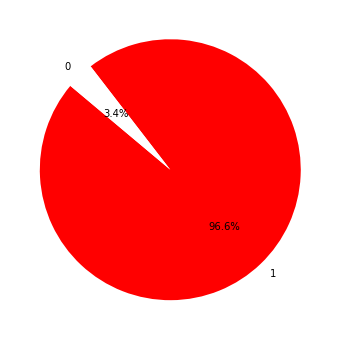

In [18]:
Counts_Owner = Data['Owner'].value_counts()
print(Counts_Owner)

# Define colors for the pie chart segments
colors = ['red', 'white']

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(Counts_Owner, labels=['1', '0'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.show()

#### Top 10 car Sales

        Car_Name  Selling_Price
0           city         192.90
1       fortuner         151.64
2  corolla altis         114.93
3         innova         111.51
4          verna          85.51
5           ciaz          67.25
6           brio          47.45
7            i20          42.90
8           jazz          40.80
9      grand i10          39.55


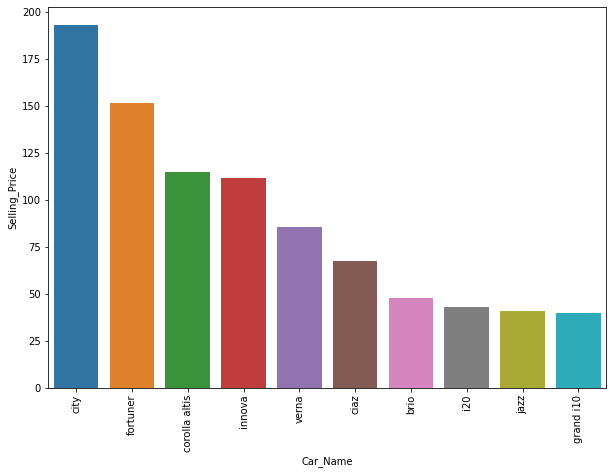

In [19]:
Top_10 = pd.DataFrame(Data.groupby('Car_Name')['Selling_Price'].sum().sort_values(ascending=False).head(10))
Top_10.reset_index(inplace=True)
print(Top_10)
plt.figure(figsize=(10,7))
sns.barplot(x='Car_Name' , y='Selling_Price' , data=Top_10 )
plt.xticks(rotation=90)
plt.show()

#### Top 10 Cars Price

        Car_Name  Present_Price
0           city         306.59
1  corolla altis         281.32
2       fortuner         246.23
3         innova         147.16
4          verna         131.60
5   land cruiser          92.60
6           ciaz          87.81
7            i20          64.85
8           brio          60.44
9           jazz          57.10


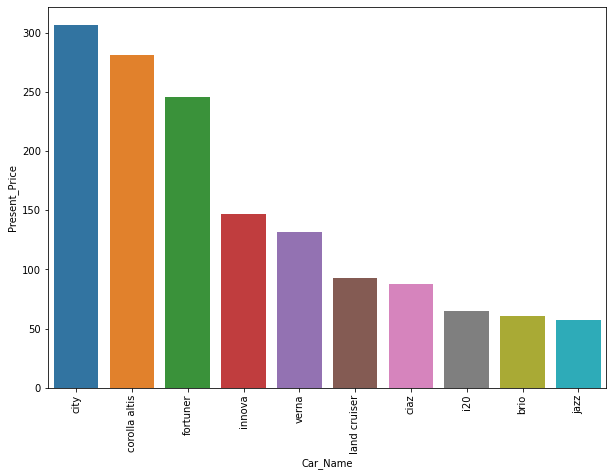

In [20]:
Top_10 = pd.DataFrame(Data.groupby('Car_Name')['Present_Price'].sum().sort_values(ascending=False).head(10))
Top_10.reset_index(inplace=True)
print(Top_10)
plt.figure(figsize=(10,7))
sns.barplot(x='Car_Name' , y='Present_Price' , data=Top_10 )
plt.xticks(rotation=90)
plt.show()

#### How many transmissions by the cars

In [21]:
pd.DataFrame(Data.groupby('Car_Name')['Transmission'].value_counts().sort_values(ascending=False))

,,Transmission
Car_Name,Transmission,
city,Manual,25
corolla altis,Manual,13
verna,Manual,13
brio,Manual,9
i20,Manual,8
...,...,...
KTM 390 Duke,Manual,1
Hyosung GT250R,Manual,1
Honda Karizma,Manual,1


#### How many Seller Type by cars

In [22]:
pd.DataFrame(Data.groupby('Car_Name')['Seller_Type'].value_counts().sort_values(ascending=False))

,,Seller_Type
Car_Name,Seller_Type,
city,Dealer,26
corolla altis,Dealer,16
verna,Dealer,14
brio,Dealer,10
i20,Dealer,9
...,...,...
Hero Splender Plus,Individual,1
Hero Passion X pro,Individual,1
Honda CB Trigger,Individual,1


In [23]:
Data.drop(['Car_Name' , 'Year', 'Current_Year'] , axis=1 , inplace=True)

In [24]:
Data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,number of years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


#### Encoding categorical data

In [25]:
Data = pd.get_dummies(Data)
Data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,number of years,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,10,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,11,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,7,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,13,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,10,0,1,0,1,0,0,1


In [26]:
x = Data.drop('Selling_Price' , axis=1)
y = Data['Selling_Price']

In [27]:
Data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,number of years,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
Selling_Price,1.000000,0.883962,0.120245,-0.099749,-0.230676,-0.024951,0.532567,-0.520177,0.569688,-0.569688,0.353074,-0.353074
Present_Price,0.883962,1.000000,0.347093,-0.091076,0.035716,-0.009343,0.449407,-0.441390,0.541652,-0.541652,0.299434,-0.299434
Kms_Driven,0.120245,0.347093,1.000000,-0.011928,0.595603,0.039377,0.290318,-0.294592,0.356032,-0.356032,-0.021160,0.021160
Owner,-0.099749,-0.091076,-0.011928,1.000000,0.124768,-0.015693,-0.042885,0.045573,-0.100228,0.100228,-0.068615,0.068615
number of years,-0.230676,0.035716,0.595603,0.124768,1.000000,0.024111,-0.068800,0.062851,-0.010157,0.010157,-0.073445,0.073445
Fuel_Type_CNG,-0.024951,-0.009343,0.039377,-0.015693,0.024111,1.000000,-0.040160,-0.168553,0.060653,-0.060653,-0.030258,0.030258
Fuel_Type_Diesel,0.532567,0.449407,0.290318,-0.042885,-0.068800,-0.040160,1.000000,-0.978128,0.351973,-0.351973,0.070330,-0.070330
Fuel_Type_Petrol,-0.520177,-0.441390,-0.294592,0.045573,0.062851,-0.168553,-0.978128,1.000000,-0.359843,0.359843,-0.063081,0.063081
Seller_Type_Dealer,0.569688,0.541652,0.356032,-0.100228,-0.010157,0.060653,0.351973,-0.359843,1.000000,-1.000000,0.085411,-0.085411
Seller_Type_Individual,-0.569688,-0.541652,-0.356032,0.100228,0.010157,-0.060653,-0.351973,0.359843,-1.000000,1.000000,-0.085411,0.085411


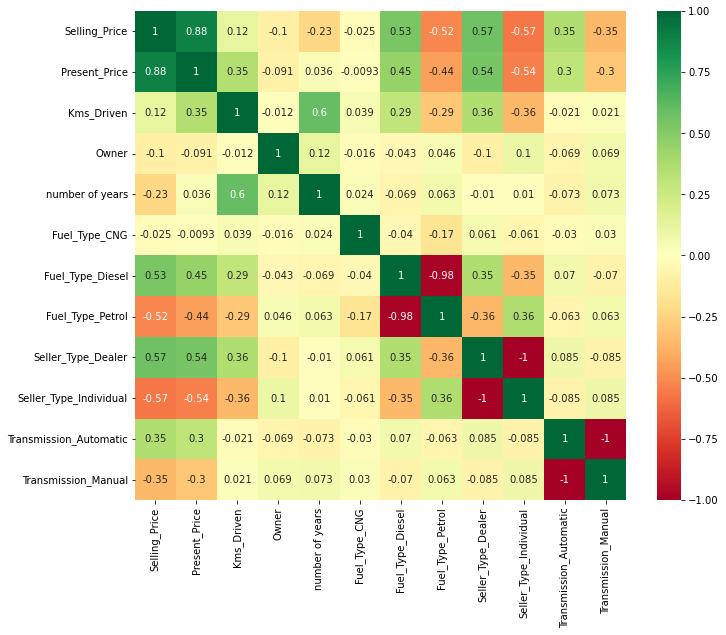

In [28]:
plt.figure(figsize=(11,9))
h=sns.heatmap(Data.corr(),annot=True ,cmap="RdYlGn")

#### Splitting the dataset into the Training set and Test set

In [29]:
x_train  , x_test , y_train , y_test = train_test_split(x , y , train_size=0.3 , random_state=101 )

#### Feature Scaling

In [30]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Model Building and Training

#### Linear Regression

Accuracy  : 88.0 %
r2_score : 0.8700098331591898
Mean Absolute Error: 1.2347801820494155
Mean Squared Error: 3.3304159291662234
Root_mean_squared_error: 1.8249427194205914


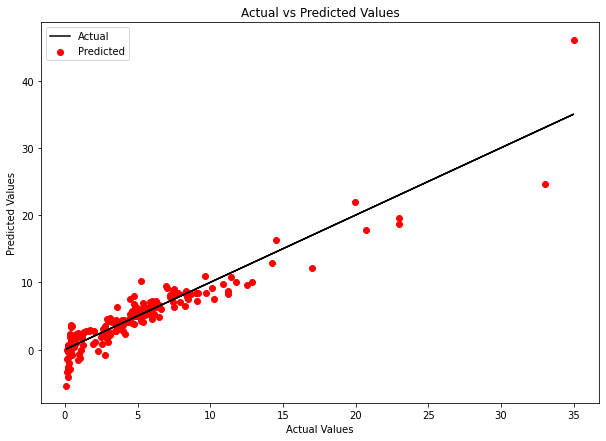

In [31]:
Model = LinearRegression()
Model.fit(x_train , y_train)

predict = Model.predict(x_test)

print('Accuracy  :',np.ceil(Model.score(x_test, y_test)*100) , '%')

print('r2_score :',(r2_score(y_test, predict)))

mae=mean_absolute_error(y_test, predict)
print("Mean Absolute Error:" , mae )


mse=mean_squared_error(y_test, predict)
print("Mean Squared Error:" , mse)

print('Root_mean_squared_error:', np.sqrt(mean_squared_error(y_test, predict)))


plt.figure(figsize=(10,7))
plt.plot(y_test, y_test, color='Black', label='Actual')
plt.scatter(y_test, predict, color='red', label='Predicted')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

plt.show()

#### Random Forest Regressor

Accuracy  : 87.0 %
r2_score  : 0.8608318251815994
Mean Absolute Error: 0.7296818627450983
Mean Squared Error: 3.5655612844607845
Root_mean_squared_error: 1.8882693887421849


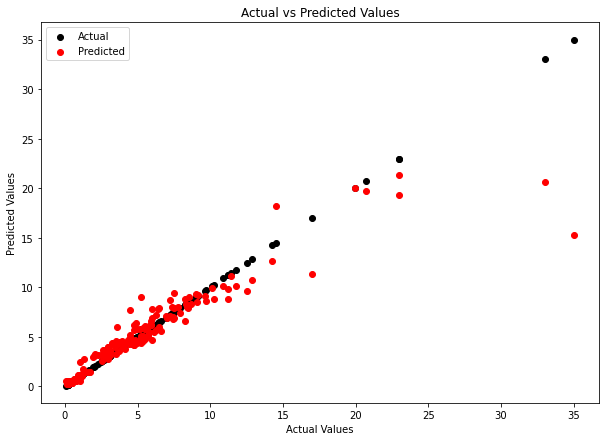

In [32]:
model = RandomForestRegressor()
model.fit(x_train,y_train)

Y_pred = model.predict(x_test)

print('Accuracy  :',np.ceil(model.score(x_test, y_test)*100) , '%')

print('r2_score  :', (r2_score(y_test, Y_pred)) )

mae=mean_absolute_error(y_test, Y_pred)
print("Mean Absolute Error:" , mae )


mse=mean_squared_error(y_test, Y_pred)
print("Mean Squared Error:" , mse)

print('Root_mean_squared_error:', np.sqrt(mean_squared_error(y_test, Y_pred)))



plt.figure(figsize=(10,7))
plt.scatter(y_test, y_test, color='black', label='Actual')
plt.scatter(y_test, Y_pred, color='red', label='Predicted')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

plt.show()

#### Decision Tree Regressor

In [33]:
dt_reg = DecisionTreeRegressor(random_state = 0)
dt_reg.fit(x_train, y_train)
y_pred=dt_reg.predict(x_test)

print('Accuracy  :',np.ceil(model.score(x_test, y_test)*100) , '%')

print('r2_score  :',(r2_score(y_test, y_pred)))

mae=mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:" , mae )


mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('Root_mean_squared_error:', np.sqrt(mean_squared_error(y_test, y_pred)))


Accuracy  : 87.0 %
r2_score  : 0.890412547205909
Mean Absolute Error: 0.7753431372549018
Mean Squared Error: 2.807687745098039
Root_mean_squared_error: 1.6756156316703539


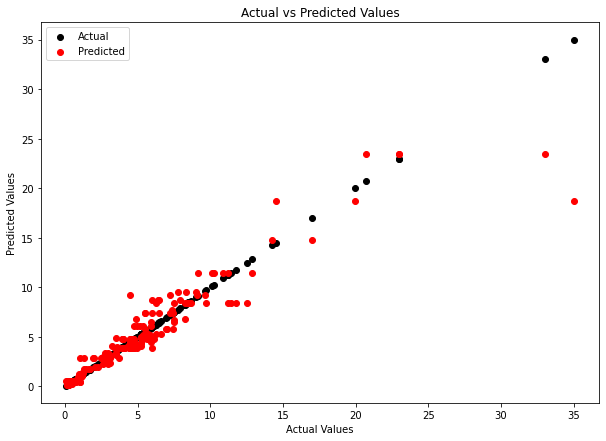

In [34]:
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_test, color='black', label='Actual')
plt.scatter(y_test, y_pred, color='red', label='Predicted')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

plt.show()